In [1]:
%%html
<img src='Flag/flag.jpg'>

# Belarus statistics and comparison

## Point of comparison/argue: how far away Belarus is in the economic field among other countries (especially all three Baltic states) from the moment of USSR collapse?
Countries were chosen from a pool of former USSR (15 countries), including Belarus itself. 
In several plots, World and European Union averages were also compared.
All data was collected from open sources : 

* https://data.worldbank.org/;
* https://www.transparency.org/en/cpi;

and reshaped.

In [2]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Importing **9** .csv tables: (1) GDP, (2) GDP per capita, (3.1) GDP PPP, (3.2) GDP PPP per capita, (4) GINI index, (5) Foreign Exchange Reserves, (6) Inflation Rate, (7) Corruption perception index, (8) Unemployment.

In [3]:
path_gdp_nominal = pathlib.Path('Data source [csv]\\1 GDP nominal (US$).csv')
path_gdp_per_capita = pathlib.Path('Data source [csv]\\2 GDP per capita (US$).csv')
path_gdp_ppp = pathlib.Path('Data source [csv]\\3 GDP  PPP (international $).csv')
path_gdp_ppp_per_employed = pathlib.Path('Data source [csv]\\3 GDP per capita PPP (international $).csv')
path_gini = pathlib.Path('Data source [csv]\\4 GINI index (globalization).csv')
path_fer = pathlib.Path('Data source [csv]\\5 Foreign Exchange Reserves (US$).csv')
path_ir = pathlib.Path('Data source [csv]\\6 Inflation Rate.csv')
path_cpi = pathlib.Path('Data source [csv]\\7 Corruption perception index.csv')
path_unemployment = pathlib.Path('Data source [csv]\\8 Unemployment (% of total labor force).csv')

Creating color palette for all countries, representing a color or fragment of a color of its national flag.

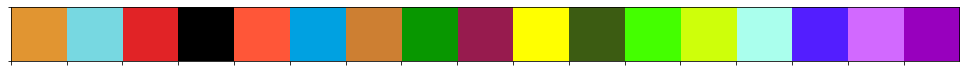

In [4]:
colors = ['#E19531', '#77D8E1', '#E12326', '#000000', '#FF5638',  
          '#00A1E1', '#CD7F32', '#089700', '#971B4E', '#FFFF00',
          '#3C5C12', '#44FF00', '#CEFF0A', '#AAFFED', '#531EFF',
          '#D269FF', '#9800BE']
sns.set_palette(sns.color_palette(colors))
sns.palplot(sns.color_palette(colors))

## GDP

**GDP** at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.

In [5]:
df_gdp = pd.read_csv(path_gdp_nominal, low_memory=False)
df_gdp = df_gdp.drop(['Country Code'], axis=1)
index_ru = df_gdp[df_gdp['Country Name'] == 'Russian Federation'].index
index_eu = df_gdp[df_gdp['Country Name'] == 'European Union'].index
index_wr = df_gdp[df_gdp['Country Name'] == 'World'].index
df_gdp = df_gdp.drop(index=[index_ru[0],index_eu[0], index_wr[0]], axis=0)
df_gdp.head(10)

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Armenia,1.468317e+09,1.596969e+09,1.639492e+09,1.893726e+09,1.845482e+09,1.911564e+09,2.118468e+09,2.376335e+09,2.807061e+09,...,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.054614e+10,1.152746e+10,1.245794e+10,1.367280e+10
1,Azerbaijan,3.052468e+09,3.176703e+09,3.962735e+09,4.446370e+09,4.581247e+09,5.272617e+09,5.707720e+09,6.235857e+09,7.276013e+09,...,5.290270e+10,6.595163e+10,6.968394e+10,7.416444e+10,7.524429e+10,5.307437e+10,3.786752e+10,4.086556e+10,4.711294e+10,4.804765e+10
2,Belarus,1.397268e+10,1.475685e+10,1.412841e+10,1.522201e+10,1.213849e+10,1.273686e+10,1.235482e+10,1.459425e+10,1.782779e+10,...,5.722249e+10,6.175779e+10,6.568510e+10,7.552798e+10,7.881384e+10,5.645473e+10,4.772266e+10,5.472660e+10,6.003126e+10,6.308046e+10
3,Estonia,4.497824e+09,4.780170e+09,5.147711e+09,5.665917e+09,5.762048e+09,5.694070e+09,6.259258e+09,7.372457e+09,9.877637e+09,...,1.969361e+10,2.339153e+10,2.319271e+10,2.527141e+10,2.677347e+10,2.304886e+10,2.399645e+10,2.685910e+10,3.074716e+10,3.138695e+10
4,Georgia,2.693732e+09,3.094935e+09,3.510520e+09,3.613498e+09,2.800026e+09,3.057475e+09,3.219489e+09,3.395728e+09,3.991285e+09,...,1.224351e+10,1.510744e+10,1.648840e+10,1.718955e+10,1.762700e+10,1.495395e+10,1.514176e+10,1.624292e+10,1.759970e+10,1.774320e+10
5,Kazakhstan,2.037431e+10,2.103536e+10,2.216593e+10,2.213525e+10,1.687082e+10,1.829199e+10,2.215269e+10,2.463659e+10,3.083370e+10,...,1.480000e+11,1.930000e+11,2.080000e+11,2.370000e+11,2.210000e+11,1.840000e+11,1.370000e+11,1.670000e+11,1.790000e+11,1.800000e+11
6,Kyrgyz Republic,1.661019e+09,1.827571e+09,1.767864e+09,1.645964e+09,1.249061e+09,1.369688e+09,1.525116e+09,1.605643e+09,1.919008e+09,...,4.794358e+09,6.197766e+09,6.605140e+09,7.335028e+09,7.468097e+09,6.678178e+09,6.813092e+09,7.702935e+09,8.271109e+09,8.454620e+09
7,Lithuania,7.870782e+09,8.385109e+09,1.012027e+10,1.124036e+10,1.097288e+10,1.153921e+10,1.225250e+10,1.427836e+10,1.880258e+10,...,3.703446e+10,4.346613e+10,4.284254e+10,4.644206e+10,4.852600e+10,4.139240e+10,4.302197e+10,4.775091e+10,5.345517e+10,5.421932e+10
8,Latvia,5.770516e+09,5.952007e+09,6.508472e+09,7.145882e+09,7.518045e+09,7.934206e+09,8.334748e+09,9.529949e+09,1.173170e+10,...,2.380391e+10,2.849070e+10,2.817663e+10,3.027257e+10,3.138278e+10,2.709002e+10,2.773414e+10,3.027301e+10,3.431387e+10,3.411720e+10
9,Moldova,1.752980e+09,1.695122e+09,1.930081e+09,1.698718e+09,1.170783e+09,1.288429e+09,1.480674e+09,1.661818e+09,1.980907e+09,...,6.974960e+09,8.414361e+09,8.709165e+09,9.496685e+09,9.510219e+09,7.745232e+09,8.071481e+09,9.669760e+09,1.145741e+10,1.195544e+10


In [6]:
df_gdp = df_gdp.melt(id_vars=['Country Name'], var_name='year', value_name='GDP')
df_gdp['GDP'] = df_gdp['GDP'] / 1000000

[]

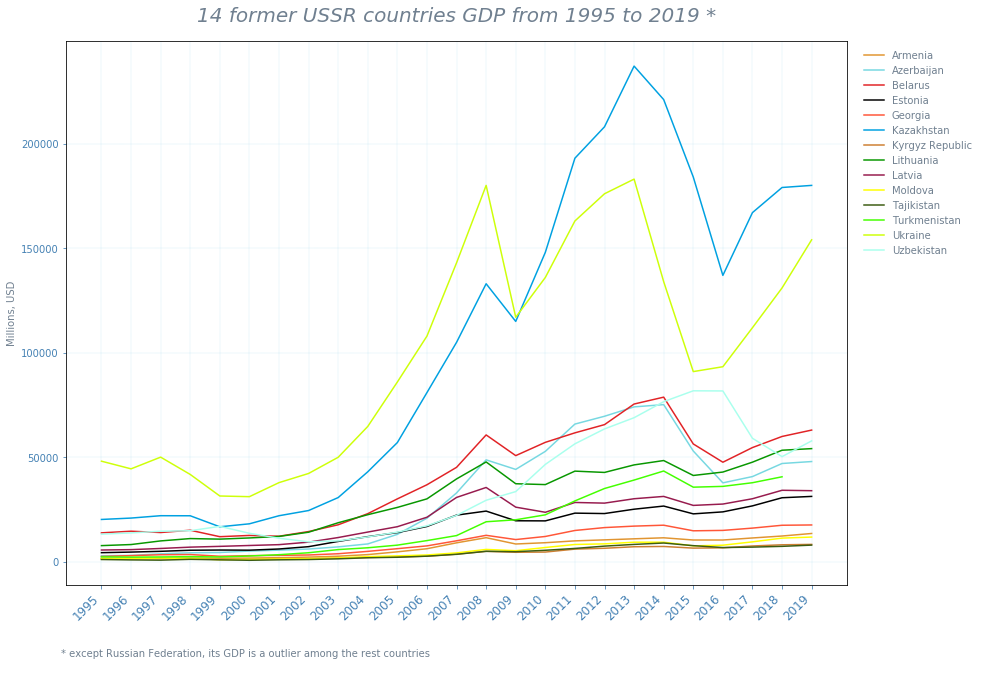

In [7]:
plt.figure(figsize=(14,10))
gdp = sns.lineplot(x='year', y='GDP', hue='Country Name', data=df_gdp)

for item in gdp.get_xticklabels():
    item.set_rotation(45)    
plt.xticks(ha='right',fontweight='light',fontsize='large')

handles, labels = gdp.get_legend_handles_labels()
legend = gdp.legend(handles=handles[1:], labels=labels[1:], bbox_to_anchor=(1.01, 1), loc='upper left', frameon=False)
for text in legend.get_texts():
    text.set_color('slategrey')


plt.title(f'14 former USSR countries GDP from 1995 to 2019 *',fontsize=20, fontstyle='italic', color='slategrey', y=1.025)
plt.ylabel("Millions, USD")
plt.xlabel(None)

gdp.yaxis.grid(linestyle='--', linewidth='0.2', color='skyblue')
gdp.xaxis.grid(linestyle='--', linewidth='0.2', color='skyblue')
gdp.tick_params(axis='x', colors='steelblue')
gdp.tick_params(axis='y', colors='steelblue')
gdp.yaxis.label.set_color('slategrey')
matplotlib.rc('axes',edgecolor='slategrey')

plt.figtext(.12, .01,("\n"*4) +  """* except Russian Federation, its GDP is a outlier among the rest countries\n""", 
            color='slategrey', weight='light' ) 
gdp.plot()

**Insight**: *Kazakhstan and Ukrainian GDP outlying from the other countries. Belarus reached third place (outranked Uzbekistan from 2017) in 2019, but Lithuania is still nearby despite the quite big population differences. Remaining Baltic states are also catching the Belarus. Other former USSR countries(except Russian Federation) are mainly at the bottom in this graph.*

## GDP per capita

**GDP per capita** is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

In [8]:
df_gdp_pc = pd.read_csv(path_gdp_per_capita, low_memory=False)
df_gdp_pc = df_gdp_pc.drop(['Country Code'], axis=1)
df_gdp_pc = df_gdp_pc.melt(id_vars=['Country Name'], var_name='year', value_name='GDP')
df_gdp_pc

,Country Name,year,GDP
0,Armenia,1995,456.375049
1,Azerbaijan,1995,397.198116
2,Belarus,1995,1370.676559
3,Estonia,1995,3130.807094
4,Georgia,1995,578.336763
...,...,...,...
420,Ukraine,2019,3659.031312
421,Uzbekistan,2019,1724.841134
422,Russian Federation,2019,11584.995380
423,European Union,2019,35460.250430


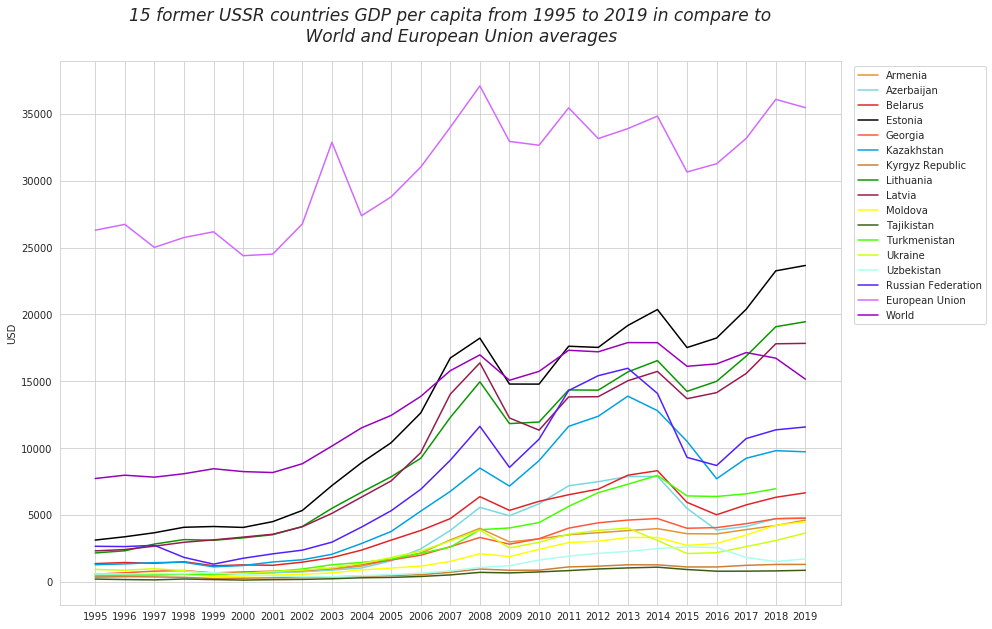

In [9]:
with sns.axes_style('whitegrid'):  
    plt.figure(figsize=(14,10))
    df_gdp_per_capita = sns.lineplot(x='year', y='GDP', hue='Country Name', data=df_gdp_pc)
    handles, labels = df_gdp_per_capita.get_legend_handles_labels()
    plt.xlabel(None)
    plt.ylabel("USD")
    plt.title('''15 former USSR countries GDP per capita from 1995 to 2019 in compare to
    World and European Union averages''',fontsize=17,fontstyle='italic', y=1.025)
    plt.legend(handles=handles[1:], labels=labels[1:], bbox_to_anchor=(1.01, 1), loc='upper left', edgecolor=None)

**Insight**: *EU average GDP per capita is about two times above former USSR countries. 3 Baltic states (Estonia-Lithuania-Latvia) that entered the EU in 2004, settling quite a bit lower. All the rest 12 former USSR countries including Belarus are even lower than the World average GDP per capita.*

## GDP PPP

**GDP PPP** indicator provides values for gross domestic product (GDP) expressed in current international dollars, converted by purchasing power parity (PPP) conversion factor.  GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. PPP conversion factor is a spatial price deflator and currency converter that eliminates the effects of the differences in price levels between countries.

In [10]:
df_gdp_ppp = pd.read_csv(path_gdp_ppp, low_memory=False)
df_gdp_ppp = df_gdp_ppp.drop(['Country Code'], axis=1).set_index('Country Name')
df_gdp_ppp.head(10)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Armenia,5.850062e+09,6.306591e+09,6.628400e+09,7.192323e+09,7.536939e+09,8.160046e+09,9.139577e+09,1.050965e+10,1.220350e+10,1.384791e+10,...,2.159805e+10,2.308552e+10,2.700910e+10,2.850015e+10,2.923147e+10,2.916684e+10,3.142919e+10,3.567653e+10,3.841734e+10,4.205783e+10
Azerbaijan,1.813058e+10,1.870257e+10,2.012853e+10,2.239059e+10,2.439469e+10,2.770837e+10,3.111943e+10,3.459546e+10,3.883512e+10,4.357112e+10,...,1.350000e+11,1.360000e+11,1.480000e+11,1.620000e+11,1.660000e+11,1.440000e+11,1.400000e+11,1.390000e+11,1.450000e+11,1.500000e+11
Belarus,3.928800e+10,4.112759e+10,4.660618e+10,5.108972e+10,5.358949e+10,5.796514e+10,6.203567e+10,6.619630e+10,7.217455e+10,8.260392e+10,...,1.460000e+11,1.570000e+11,1.710000e+11,1.790000e+11,1.800000e+11,1.710000e+11,1.680000e+11,1.740000e+11,1.830000e+11,1.890000e+11
Estonia,9.281317e+09,9.726483e+09,1.114912e+10,1.169675e+10,1.170526e+10,1.318369e+10,1.433407e+10,1.609752e+10,1.798800e+10,1.978607e+10,...,2.903870e+10,3.289058e+10,3.464214e+10,3.643284e+10,3.830019e+10,3.866919e+10,4.109406e+10,4.455514e+10,4.806448e+10,5.148647e+10
Georgia,8.776821e+09,9.938530e+09,1.117338e+10,1.164996e+10,1.215726e+10,1.265752e+10,1.355674e+10,1.452499e+10,1.643084e+10,1.785091e+10,...,2.864280e+10,3.140496e+10,3.664011e+10,3.945105e+10,4.305425e+10,4.503549e+10,4.793006e+10,5.066248e+10,5.438341e+10,5.817395e+10
Kazakhstan,9.370853e+10,9.590149e+10,9.921364e+10,9.842404e+10,1.030000e+11,1.150000e+11,1.340000e+11,1.490000e+11,1.660000e+11,1.870000e+11,...,3.140000e+11,3.440000e+11,3.700000e+11,4.170000e+11,4.270000e+11,4.070000e+11,4.240000e+11,4.480000e+11,4.780000e+11,5.080000e+11
Kyrgyz Republic,6.396322e+09,6.974886e+09,7.798663e+09,8.053776e+09,8.468737e+09,9.129340e+09,9.826071e+09,9.979766e+09,1.087974e+10,1.195772e+10,...,1.681032e+10,1.818366e+10,2.028769e+10,2.312373e+10,2.498658e+10,2.510732e+10,2.845920e+10,3.128040e+10,3.322175e+10,3.532448e+10
Lithuania,2.149273e+10,2.296440e+10,2.527020e+10,2.755334e+10,2.756532e+10,2.960469e+10,3.280521e+10,3.613275e+10,4.121445e+10,4.400847e+10,...,6.211260e+10,6.911356e+10,7.363574e+10,7.891108e+10,8.256427e+10,8.373060e+10,8.869985e+10,9.565997e+10,1.000000e+11,1.060000e+11
Latvia,1.364237e+10,1.419292e+10,1.573066e+10,1.698572e+10,1.766660e+10,1.898199e+10,2.107769e+10,2.322324e+10,2.519292e+10,2.760829e+10,...,3.691784e+10,4.076057e+10,4.331316e+10,4.567262e+10,4.754033e+10,4.910382e+10,5.174065e+10,5.533255e+10,5.905749e+10,6.160033e+10


In [11]:
def percentage_dimension(source):
    stack_for_diff = []
    data = list(df_gdp_ppp.loc[source, :])
    for i in range(1,len(df_gdp_ppp.loc[source,:])):
        stack_for_diff.append((data[i] / data[i-1]))
    return stack_for_diff

In [12]:
def gdppp_95_04(source=list):
    gdppp_by_95_04 = source[0:9].copy()
    return round((sum(gdppp_by_95_04) / len(gdppp_by_95_04) - 1) * 100, 2)


def gdppp_05_19(source=list):
    gdppp_by_05_19 = source[9:].copy()
    return round((sum(gdppp_by_05_19) / len(gdppp_by_05_19) - 1) * 100, 2)

In [13]:
def country_gdp_ppp_95_04():
    countries = list(df_gdp_ppp.index)
    countries_stack = []
    for country in countries:
        country_gdp = gdppp_95_04(percentage_dimension(country))
        countries_stack.append(country_gdp)
    return countries_stack


def country_gdp_ppp_05_19():
    countries = list(df_gdp_ppp.index)
    countries_stack = []
    for country in countries:
        if country == 'Turkmenistan':
            country_gdp = gdppp_05_19(percentage_dimension(country)[0:-2]) # no Turkmenistan data in 2019
            countries_stack.append(country_gdp)
        else:
            country_gdp = gdppp_05_19(percentage_dimension(country)[0:-1])
            countries_stack.append(country_gdp)
    return countries_stack  

In [14]:
df_gdp_ppp['1995-2004'] = country_gdp_ppp_95_04()
df_gdp_ppp['2005-2019'] = country_gdp_ppp_05_19()
df_gdp_ppp_final = df_gdp_ppp.loc[:,['1995-2004','2005-2019']]
df_gdp_ppp_final

,1995-2004,2005-2019
Country Name,,
Armenia,10.12,8.00
Azerbaijan,10.28,9.38
Belarus,8.65,5.81
Estonia,8.87,6.77
Georgia,8.27,8.30
Kazakhstan,8.12,7.00
Kyrgyz Republic,7.24,7.57
Lithuania,8.35,6.23
Latvia,8.18,5.71


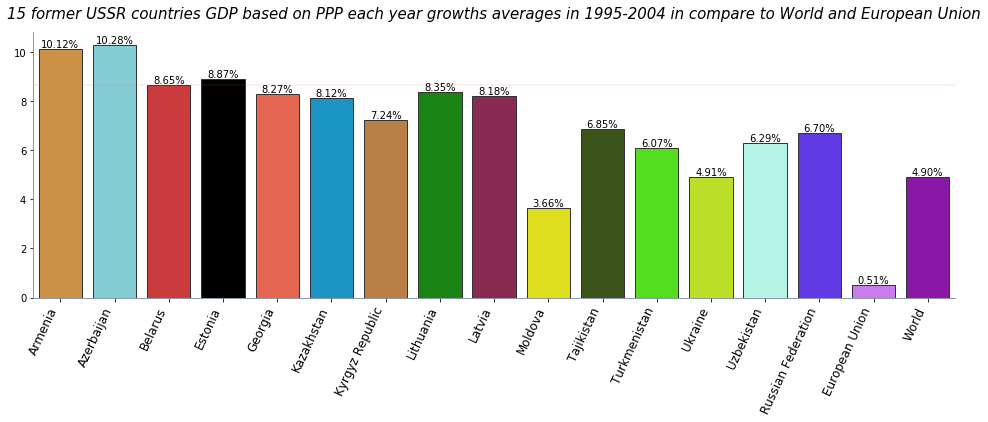

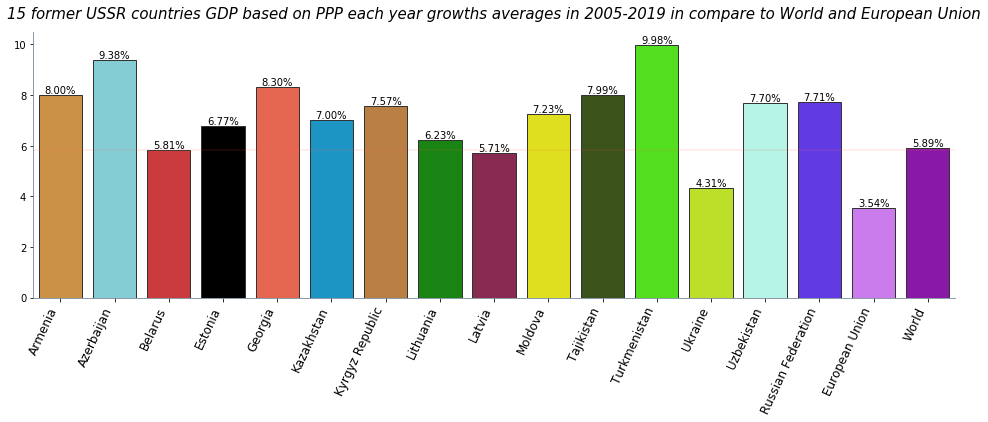

In [15]:
def plot_gdp(source,data, value, indicator):
    plt.figure(figsize=(15,6))
    gdp_ppp_plot = sns.barplot(x = source.index, y = source[data], edgecolor=".2")
    for item in gdp_ppp_plot.get_xticklabels():
        item.set_rotation(65)
    plt.xticks(ha='right',fontweight='light',fontsize='large')
    [plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]
    for a in gdp_ppp_plot.patches:
        gdp_ppp_plot.annotate('{:.2f}'.format(a.get_height()) + value, (a.get_x()+0.4, a.get_height()),
                              ha='center', va='bottom', color= 'black') 
    gdp_ppp_plot.axhline(y = source.loc['Belarus',data], zorder=1, linewidth=0.2, color='tomato')
    plt.xlabel(None)    
    plt.ylabel(None)
    plt.title(f'15 former USSR countries GDP based on {indicator} in {data}'
              f' in compare to World and European Union', fontsize=15, fontstyle='italic', y=1.03)
    plt.tight_layout()

    
plot_gdp(df_gdp_ppp_final, '1995-2004', '%', 'PPP each year growths averages')
plot_gdp(df_gdp_ppp_final, '2005-2019', '%', 'PPP each year growths averages')

**Insight**: *Two bar plots show how many percent GDP based on PPP in each of the former USSR countries (in comparison to EU and World averages) averagely grew each year. From 1995 till 2004 Armenia and Azerbaijan are the leaders, other countries are mostly at the same rate, from 6% till 9% (except Moldova and Ukraine). EU indicators were imperturbable. From 2005 Turkmenistan took the lead. The Belarus is quite similar to the World's percentage but lost this distance to Estonia and Lithuania.*

## GDP PPP per capita

**GDP PPP per capita** indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. Conversion factor is a spatial price deflator and currency converter that controls for price level differences between countries. Total population is a mid-year population based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.

In [16]:
df_gdp_ppp_pc = pd.read_csv(path_gdp_ppp_per_employed, low_memory=False)
df_gdp_ppp_pc = df_gdp_ppp_pc.drop(['Country Code'], axis=1).set_index('Country Name')
df_gdp_ppp_pc.head(10)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Armenia,1818.286948,1990.577896,2115.611643,2313.620772,2439.911173,2658.349518,2995.907863,3463.983780,4043.663101,4614.862114,...,7506.308865,8025.452905,9364.407767,9835.833011,10036.889840,9969.685301,10704.233410,12115.057010,13014.992030,14219.627710
Azerbaijan,2359.216402,2409.193306,2567.987405,2829.595097,3055.925307,3442.631932,3836.599591,4233.440063,4716.377612,5245.425251,...,14926.637640,14804.574450,15957.718850,17188.945510,17443.878260,14938.401130,14371.022740,14121.406940,14544.953360,15000.816500
Belarus,3854.031976,4047.990731,4606.719594,5073.961933,5344.658213,5808.357426,6248.211382,6709.845503,7367.193779,8489.484087,...,15349.228130,16543.043730,18071.505600,18948.468470,18955.907030,18041.242500,17725.752180,18280.198920,19330.868880,19943.292520
Estonia,6460.460136,6870.955277,7966.306455,8438.264699,8419.571355,9437.242789,10326.285270,11670.365270,13123.028050,14521.356570,...,21809.423910,24777.468190,26190.552950,27642.585370,29135.704400,29397.129840,31231.471150,33820.918730,36358.027760,38811.143340
Georgia,1884.359102,2212.643891,2568.643336,2745.296812,2924.391460,3104.515679,3377.051119,3650.857220,4157.879407,4545.293132,...,7564.063061,8360.297207,9826.052753,10611.774120,11575.547210,12089.169410,12858.483400,13589.707390,14593.504870,15636.553760
Kazakhstan,5925.059979,6156.254923,6470.298906,6530.560445,6868.835504,7733.789443,8985.655500,10021.896960,11119.887810,12428.836000,...,19225.076910,20779.445510,22032.175860,24504.767520,24726.472870,23224.117840,23818.824830,24862.966120,26147.046070,27443.571170
Kyrgyz Republic,1402.579196,1506.975557,1660.561941,1688.776658,1749.594380,1863.739190,1987.031711,1999.672673,2157.265386,2342.492743,...,3085.651936,3297.366837,3618.149726,4042.893053,4281.824074,4214.829509,4681.174733,5046.691535,5254.278486,5470.811536
Lithuania,5922.326260,6376.143738,7068.317313,7762.968137,7821.640848,8459.605057,9451.723494,10494.349230,12067.900910,13031.533270,...,20053.904080,22823.954160,24645.693540,26679.978570,28156.185840,28823.818090,30924.930940,33821.195450,35831.862820,38214.206930
Latvia,5489.763591,5776.003306,6465.938329,7047.961230,7390.392737,8017.565047,9018.467880,10052.595880,11011.109060,12199.207470,...,17600.417240,19789.477840,21291.231240,22692.810350,23844.296320,24830.922970,26404.525690,28488.923610,30644.608290,32204.457840


In [17]:
def average_calc_list(source):
    stack_for_avg = []
    for country in source:
        country_avg = df_gdp_ppp_pc.apply(lambda x: x[country], axis=0).mean()
        stack_for_avg.append(country_avg)
    return stack_for_avg


df_gdp_ppp_pc['1994-2015'] = average_calc_list(list(df_gdp_ppp_pc.index))
average_gdp_ppp_pc = df_gdp_ppp_pc[['1994-2015']]

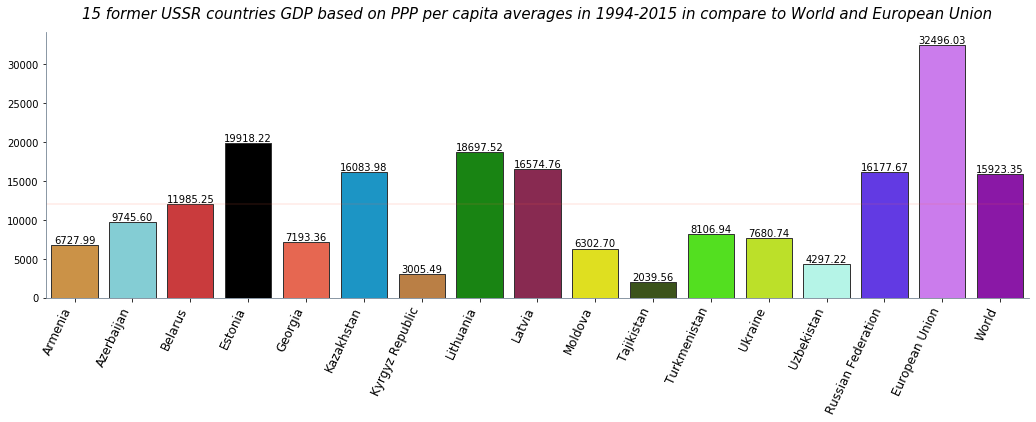

In [18]:
plot_gdp(average_gdp_ppp_pc , '1994-2015', '','PPP per capita averages')

**Insight**: *The Belarus metrics are quite lower despite the fact that it was at very quite the same level as Lithuania and Latvia in 1995 (several years after the collapse of the USSR). Also we can derive the fact that Baltic states outrank even Kazakhstan and Russian Federation (both are rich in raw materials and minerals). Absolute outlier in this graph is the EU.*

## Gini index

**Gini index** measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.

In [19]:
df_gdp_gini = pd.read_csv(path_gini, low_memory=False)
df_gdp_gini = df_gdp_gini.drop(['Country Name'], axis=1)

In [20]:
df = df_gdp_gini.loc[:,['Country Code','2005','2010','2015']]
df = df.drop(index=[1, 10, 11, 13])
df.head(10)

,Country Code,2005,2010,2015
0,ARM,36.0,30.0,32.4
2,BLR,27.6,28.6,25.6
3,EST,33.4,32.0,32.7
4,GEO,37.4,39.5,36.5
5,KAZ,39.8,28.0,26.8
6,KGZ,32.6,30.1,29.0
7,LTU,35.3,33.6,37.4
8,LVA,39.0,35.0,34.2
9,MDA,36.3,32.1,27.0
12,UKR,29.0,24.8,25.5


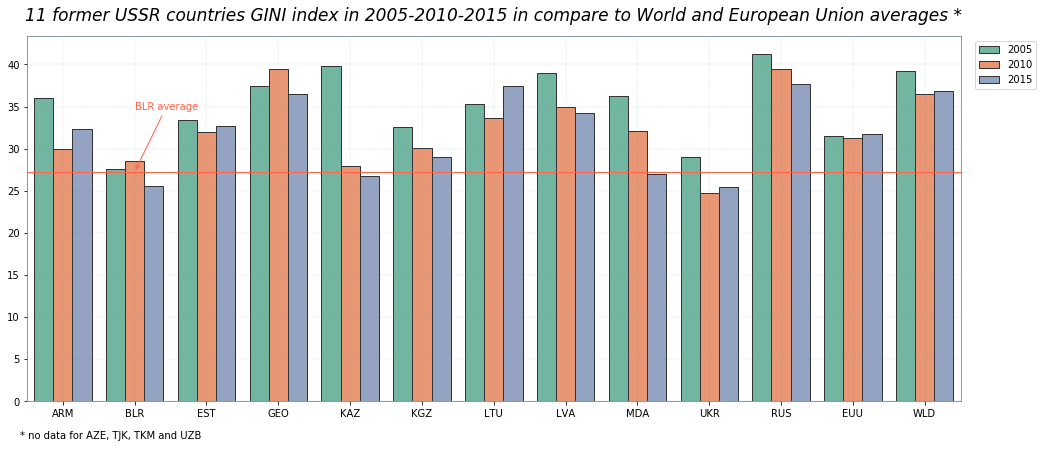

In [21]:
gini_melt = pd.melt(df, id_vars='Country Code')
plt.figure(figsize=(15,6))
df_gini = sns.barplot(x='Country Code', y='value', hue='variable', data=gini_melt, palette="Set2", edgecolor=".2")
by_avg = gini_melt[gini_melt['Country Code'] == 'BLR'].value.mean()


handles, labels = df_gini.get_legend_handles_labels()
plt.xlabel(None)
plt.ylabel(None)
plt.title('''11 former USSR countries GINI index in 2005-2010-2015 in compare to World and European Union averages *''', 
          fontsize=17, fontstyle='italic', y=1.025)
plt.legend(handles=handles[:], labels=labels[:],bbox_to_anchor=(1.01, 1), loc='upper left', edgecolor=None)
df_gini.yaxis.grid(linestyle='--', linewidth='0.15', color='cadetblue')
df_gini.xaxis.grid(linestyle='--', linewidth='0.15', color='cadetblue')
df_gini.axhline(y = by_avg, zorder=5, linewidth=1, color='tomato', label="BLR Average")
plt.figtext(.05, -.05,("\n"*4) +  """* no data for AZE, TJK, TKM and UZB\n""", color='black', weight='light' ) 
df_gini.annotate(('BLR average'), 
                 xy=(1, by_avg),
                 xytext=(1, gini_melt.iloc[1,2]+7),
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color = 'tomato'), color = 'tomato')
plt.tight_layout()


**Insight**: *GINI index of the Belarus is one of the lowest among all other countries through 2005-2010-2015. It shows that inequality level is low here, as the Gini coefficient measures the spread of households incomes across all households. On the other hand it can indicate that the entrepreneurship situation in the country is controlled by the government.*

## Foreign Exchange Reserves

Total **Foreign Exchange Reserves** comprise holdings of monetary gold, special drawing rights, reserves of IMF members held by the IMF, and holdings of foreign exchange under the control of monetary authorities. The gold component of these reserves is valued at year-end (December 31) London prices. Data are in current U.S. dollars.

In [22]:
df_fer = pd.read_csv(path_fer, low_memory=False)
df_fer = df_fer.drop(['Country Code'], axis=1).set_index('Country Name')
df_fer = df_fer.drop(index=['Russian Federation','European Union', 'World', 'Kazakhstan', 'Ukraine', 'Uzbekistan'])
df_fer.head(10)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Armenia,111182285.2,168201671.1,2.392260e+08,2.931630e+08,3.035118e+08,3.142003e+08,3.296328e+08,4.309743e+08,5.019771e+08,5.477589e+08,...,1.865824e+09,1.932472e+09,1.799374e+09,2.251610e+09,1.489443e+09,1.775293e+09,2.204114e+09,2.314114e+09,2.259322e+09,2.849645e+09
Azerbaijan,120884190.9,213661231.4,4.673192e+08,4.485407e+08,6.725896e+08,6.796055e+08,7.249794e+08,7.204718e+08,8.028397e+08,1.075084e+09,...,6.409060e+09,1.027393e+10,1.127735e+10,1.517567e+10,1.581642e+10,7.319394e+09,6.573863e+09,6.680532e+09,6.665990e+09,7.042997e+09
Belarus,377020387.9,469150024.1,3.936992e+08,7.027566e+08,2.942703e+08,3.504958e+08,3.906765e+08,6.873613e+08,6.365389e+08,8.369746e+08,...,5.025441e+09,7.863286e+09,8.094993e+09,6.654217e+09,5.067715e+09,4.172797e+09,4.907608e+09,7.315237e+09,7.157560e+09,9.393817e+09
Estonia,583006266.3,639770386.8,7.600394e+08,8.129064e+08,8.558137e+08,9.228397e+08,8.224536e+08,1.003157e+09,1.376699e+09,1.791730e+09,...,2.567138e+09,2.071157e+08,3.006598e+08,3.144061e+08,4.368330e+08,4.147984e+08,3.521407e+08,3.450365e+08,7.550056e+08,1.426439e+09
Georgia,198511607.0,191373447.2,2.017087e+08,1.328812e+08,1.443640e+08,1.159659e+08,1.619416e+08,2.021761e+08,1.961980e+08,3.866764e+08,...,2.263795e+09,2.818191e+09,2.872949e+09,2.823384e+09,2.699169e+09,2.520721e+09,2.756384e+09,3.038762e+09,3.289464e+09,3.505823e+09
Kyrgyz Republic,133632964.2,140200583.8,1.942850e+08,1.876642e+08,2.538023e+08,2.618495e+08,2.865072e+08,3.173319e+08,3.992686e+08,5.645458e+08,...,1.720379e+09,1.831422e+09,2.066679e+09,2.238391e+09,1.957489e+09,1.777941e+09,1.967811e+09,2.177014e+09,2.156977e+09,2.428568e+09
Lithuania,828984702.1,841037129.8,1.064038e+09,1.462691e+09,1.249085e+09,1.362679e+09,1.669177e+09,2.413141e+09,3.449668e+09,3.593963e+09,...,6.598354e+09,8.201665e+09,8.529341e+09,8.072526e+09,8.729461e+09,1.697150e+09,2.599865e+09,4.449679e+09,5.770956e+09,5.085045e+09
Latvia,602076773.4,746119784.0,8.324924e+08,8.729762e+08,9.443556e+08,9.191629e+08,1.217483e+09,1.326623e+09,1.536171e+09,2.020863e+09,...,7.605713e+09,6.378031e+09,7.524708e+09,7.895272e+09,3.228079e+09,3.445996e+09,3.511947e+09,4.613456e+09,4.370731e+09,4.479621e+09
Moldova,257008836.0,311957990.3,3.659856e+08,1.435625e+08,1.857010e+08,2.224903e+08,2.285323e+08,2.688559e+08,3.022708e+08,4.702589e+08,...,1.717685e+09,1.965326e+09,2.515017e+09,2.820639e+09,2.156678e+09,1.756772e+09,2.205927e+09,2.803269e+09,2.995238e+09,3.059661e+09


In [23]:
year_list = list(df_fer.columns)
for year in year_list:
    df_fer[year] = df_fer[year] / 1000000

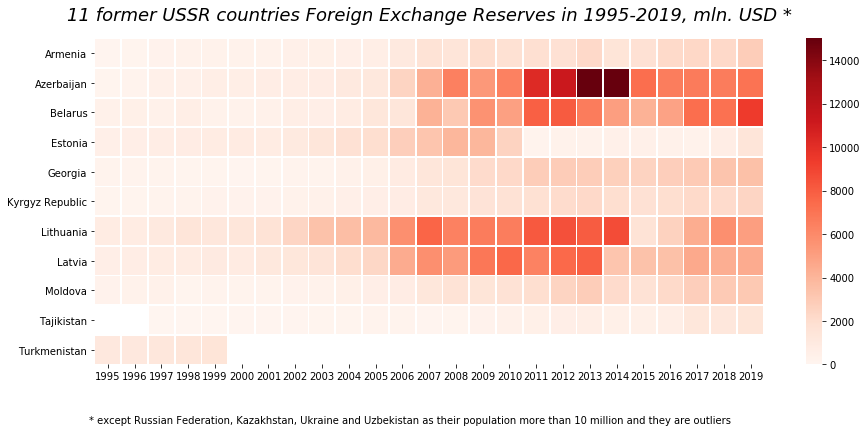

In [24]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df_fer, annot=False, robust=False,cmap='Reds', linewidths=.8, ax=ax, vmin=0, vmax=15000)
plt.ylabel(None)
plt.title('''11 former USSR countries Foreign Exchange Reserves in 1995-2019, mln. USD *''',fontsize=18,fontstyle='italic', 
          pad=18)
plt.figtext(.12, -.01,("\n"*2) +  """* except Russian Federation, Kazakhstan, Ukraine and Uzbekistan as their population more than 10 million and they are outliers""", 
            color='black', weight='light' ) 
plt.show()

**Insight**: *We can infer that all countries in the graph are quite close at this economic metric, maybe we can notice a slight rise for all Baltic states in 2005-2006 and big Azerbaijan rise in 2013-2014. On the other hand, the Belarus started raising Foreign Exchange Reserves in the past years. High Foreign Exchange Reserves is not always a good point - it is more common for developing countries as it helps to keep their currency stable.*

## Inflation

**Inflation** as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.

In [25]:
df_ir = pd.read_csv(path_ir, low_memory=False)
df_ir = df_ir.drop(['Country Code'], axis=1).set_index('Country Name')

In [26]:
df_ir = df_ir.loc[:,['2000','2005','2010','2015','2016','2017','2018','2019']]
df_ir = df_ir.drop(['Tajikistan', 'Turkmenistan', 'Uzbekistan'])
df_ir = df_ir.round(2)
df_ir.head(10)

,2000,2005,2010,2015,2016,2017,2018,2019
Country Name,,,,,,,,
Armenia,-0.79,0.64,8.18,3.73,-1.40,0.97,2.52,1.44
Azerbaijan,1.81,9.68,5.73,4.01,12.45,12.94,2.26,2.61
Belarus,168.62,10.34,7.74,13.53,11.84,6.03,4.87,5.60
Estonia,4.02,4.08,2.97,-0.49,0.15,3.42,3.44,2.28
Georgia,4.06,8.25,7.11,4.00,2.13,6.04,2.62,4.85
Kazakhstan,NaN,NaN,NaN,6.67,14.55,7.44,6.02,5.25
Kyrgyz Republic,18.70,4.34,7.97,6.50,0.39,3.18,1.54,1.13
Lithuania,0.98,2.66,1.32,-0.88,0.91,3.72,2.70,2.33
Latvia,2.65,6.75,-1.08,0.17,0.14,2.93,2.53,2.81


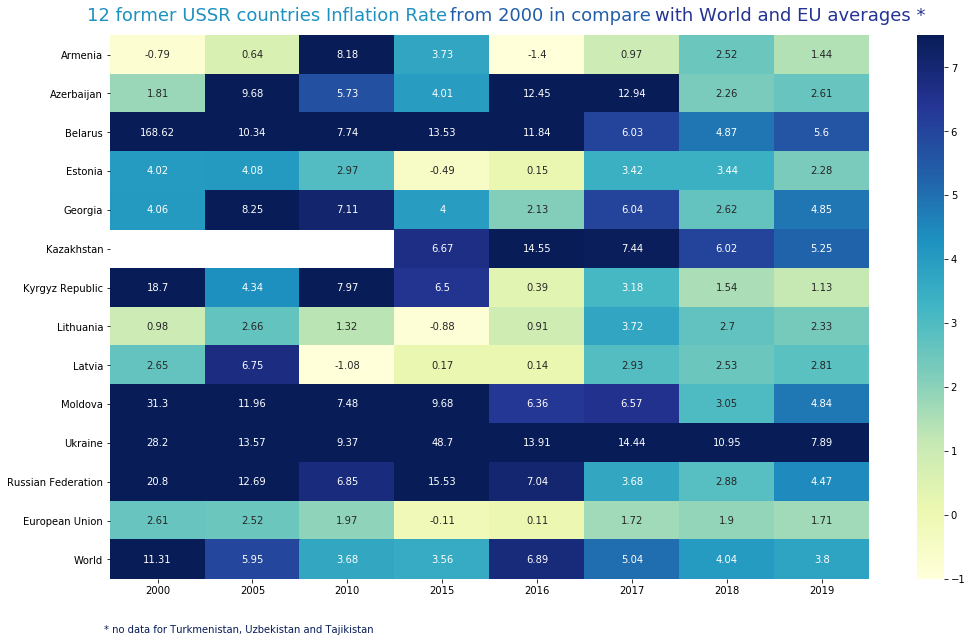

In [27]:
f, ax = plt.subplots(figsize=(17, 10))
sns.heatmap(df_ir, annot=True, robust=False,cmap='YlGnBu', ax=ax, fmt='g', vmin= -1, vmax=7.5)
plt.ylabel(None)
plt.figtext(.12, .05,("\n"*2) +  """* no data for Turkmenistan, Uzbekistan and Tajikistan""", 
            color='#081d58', weight='light' ) 
plt.figtext(0.40, 0.9, '12 former USSR countries Inflation Rate', fontsize=18, color='#1d91c0', ha ='right')
plt.figtext(0.57, 0.9, 'with World and EU averages *', fontsize=18, color='#253494', ha ='left')
plt.figtext(0.485, 0.9, 'from 2000 in compare', fontsize=18, color='#225ea8', ha ='center')
plt.show()

**Insight**: *Several former USSR countries' inflation rate became stable in 2019, but Belarus inflation rate, along with Ukraine, is one of the highest among all once brotherly-bordered countries.*

## Corruption Perceptions Index

**Corruption Perceptions Index** scores and ranks countries/territories based on how corrupt a country’s public sector is perceived to be by experts and business executives. It is a composite index, a combination of 13 surveys and assessments of corruption, collected by a variety of reputable institutions. The CPI is the most widely used indicator of corruption worldwide.

In [28]:
df_cpi = pd.read_csv(path_cpi, low_memory=False)
df_cpi = df_cpi.drop(['Country Code'], axis=1)
df_cpi.head(10)

,Country Name,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Armenia,NaN,2.5,2.5,NaN,NaN,3.0,3.1,2.9,2.9,3.0,2.9,2.7,2.6,2.63,34.0,36.0,37.0,35.0
1,Azerbaijan,NaN,1.7,1.5,2.0,2.0,1.8,1.9,2.2,2.4,2.1,1.9,2.3,2.4,2.38,27.0,28.0,29.0,29.0
2,Belarus,3.9,3.4,4.1,NaN,4.8,4.2,3.3,2.6,2.1,2.1,2.0,2.4,2.5,2.42,31.0,29.0,31.0,32.0
3,Estonia,5.7,5.7,5.7,5.6,5.6,5.5,6.0,6.4,6.7,6.5,6.6,6.6,6.5,6.35,64.0,68.0,69.0,70.0
4,Georgia,NaN,2.3,NaN,NaN,2.4,1.8,2.0,2.3,2.8,3.4,3.9,4.1,3.8,4.13,52.0,49.0,52.0,52.0
5,Kazakhstan,NaN,2.3,3.0,2.7,2.3,2.4,2.2,2.6,2.6,2.1,2.2,2.7,2.9,2.69,28.0,26.0,29.0,28.0
6,Kyrgyz Republic,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Lithuania,NaN,3.8,4.1,4.8,4.8,4.7,4.6,4.8,4.8,4.8,4.6,4.9,5.0,4.75,54.0,57.0,58.0,61.0
8,Latvia,2.7,3.4,3.4,3.4,3.7,3.8,4.0,4.2,4.7,4.8,5.0,4.5,4.3,4.19,49.0,53.0,55.0,55.0
9,Moldova,NaN,2.6,2.6,3.1,2.1,2.4,2.3,2.9,3.2,NaN,2.9,3.3,2.9,2.88,36.0,35.0,35.0,33.0


In [29]:
list_multiply_ten = ['1998', '1999', '2000', '2001', '2002', '2003', '2004', 
                     '2005', '2006','2007', '2008', '2009', '2010', '2011']
df_cpi[list_multiply_ten] = df_cpi[list_multiply_ten] * 10
df_cpi = df_cpi.round(2)
df_cpi = pd.melt(df_cpi, id_vars='Country Name')

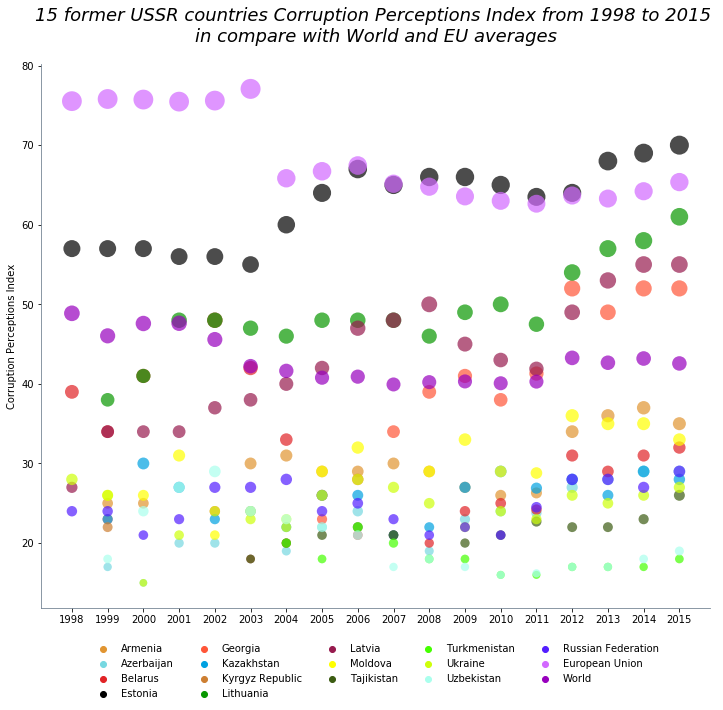

In [30]:
f, ax = plt.subplots(figsize=(12, 10))
df_cpi_plot = sns.scatterplot(x='variable',y='value',
                              hue = 'Country Name', size="value",
                              sizes=(60, 400), linewidth=0, alpha=.7,
                              data=df_cpi, ax=ax)
handles, labels = df_cpi_plot.get_legend_handles_labels()
plt.legend(handles=handles[1:18], labels=labels[1:18], bbox_to_anchor=(0.5, -0.05), 
           fancybox=True, ncol=5, loc='upper center', edgecolor=None, frameon=False)
plt.xlabel(None)
plt.ylabel('Corruption Perceptions Index')
plt.title('''15 former USSR countries Corruption Perceptions Index from 1998 to 2015 
in compare with World and EU averages''', fontsize=18, fontstyle='italic', y=1.03)
sns.despine()

**Insight**: *According to Transparency.org database, the Belarus is not at the bottom of CPI rankings, where Uzbekistan and Turkmenistan occur, but the Belarusian CPI (average is ~ 31) is quite away from EU averages (~ 65) and Baltic states (~ 51).*

## Unemployment

**Unemployment** refers to the share of the labor force that is without work but available for and seeking employment. Definitions of labor force and unemployment differ by country.

In [31]:
df_unemployment = pd.read_csv(path_unemployment, low_memory=False)
df_unemployment = df_unemployment.drop(['Country Code'], axis=1).set_index('Country Name')
df_unemployment = df_unemployment.loc[:,['1995','1998','2002','2006','2010','2014','2018']].reset_index()
df_unemployment.head(10)

,Country Name,1995,1998,2002,2006,2010,2014,2018
0,Armenia,6.700000,9.4000,NaN,NaN,19.007999,17.498501,18.9659
1,Azerbaijan,0.800000,1.1300,10.0400,6.6200,5.630000,4.910000,4.9000
2,Belarus,2.900000,2.3000,3.0000,1.2000,NaN,0.500000,4.7600
3,Estonia,9.659000,9.5098,10.0261,5.9147,16.707199,7.351800,5.3660
4,Georgia,NaN,14.5300,12.5900,13.5700,20.202700,17.438499,12.6670
5,Kazakhstan,10.980000,13.1300,9.3300,7.7900,5.770000,5.060000,4.8500
6,Kyrgyz Republic,NaN,NaN,12.5500,8.2700,8.640000,8.050000,4.5371
7,Lithuania,17.540001,13.7110,13.0080,5.7804,17.814100,10.698100,6.1471
8,Latvia,NaN,14.4635,13.8289,7.0297,19.482300,10.846300,7.4123
9,Moldova,NaN,NaN,6.8000,7.3800,7.446400,3.856400,4.1127


In [32]:
df_unemployment = pd.melt(df_unemployment, id_vars='Country Name')
df_unemployment.rename(columns = {'variable': 'Year', 'value': '%'}, inplace=True)

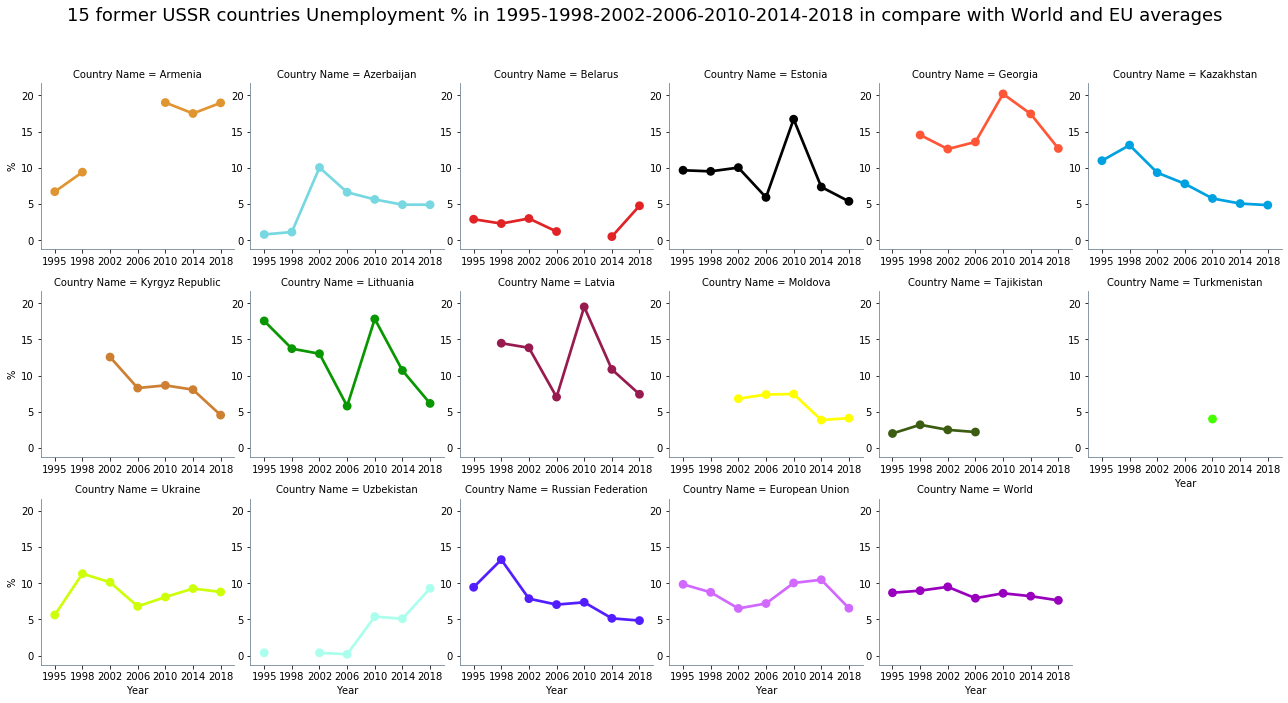

In [33]:
g = sns.FacetGrid(df_unemployment, col='Country Name', hue='Country Name', sharey=True, col_wrap=6, dropna=False)
g = g.map_dataframe(sns.pointplot, 'Year','%') 
for ax in g.axes.flatten():
    ax.tick_params(labelleft=True, labelbottom=True)
plt.suptitle('''15 former USSR countries Unemployment % in 1995-1998-2002-2006-2010-2014-2018 in compare with World and EU averages''', fontsize=18, y=1.08)
plt.show()

**Insight**: *Unemployment level in the Belarus is very low (from 2011 till 2014 it was even above 1%) till 2016 when it raised above 5%. Normal unemployment rate in the absence of shocks to the economy is in a range between 3.5% and 4.5%. But despite the fact that there are enough working places in the country we cannot bindingly claim that all working places are economically sufficient as a lot of unmodernized postsoviet plants are still working according to annualy staged plans by the government.*

# Conclusion 

1) Belarusian average nominal GDP in 1995-2019 is: 29% higher than Lithuanian, 93% higher than Latvian and 139% higher than Estonian. On the other hand its population is: 103% higher than Lithuanian, 246% higher than Latvian and 516% higher than Estonian.
 
2) Belarusian GDP per capita in the early 1995 was quite at the same level as Lithianian and Latvian, but in 2019 these Baltic states had at least 2.6 times advance in this metric.

3) Belarusian GDP based on PPP (Purchasing Power Parity) from 1994 till 2004 averagely grew at the same tempo as all three Baltic states. From 2005 till 2019 the difference in growth dynamics did not change drastically. But comparing GDP based on PPP per capita, Belarusian metrics in 2019 is near 20.000 U.S. dollars whilst the lowest value among Baltic states is 32.205 U.S. dollars.

4) The Belarus has one of the lowest Gini index among all former USSR countries. So it means that the population of Belarus should not worry about the inequality in income per household. But this fact does not mean that the income per household is high - it only shows the dispersion of the income per household in the Belarus.

5) In the past years the Belarus has been accumulating its Foreign Exchange Reserves. It is know fact, that developing countries have rather big Foreign Exchange Reserves (in comparison to developed countries as they have relatively small Foreign Exchange Reserves) as this is an instrument to control their export/import flow by buying foreign currencies and regulating (major point is to reduce) its own currency in relation to U.S. dollar. Of course, high Foreign Exchange Reserves is a good 'safety bag' if any unpredictable facts destabilize the economy.

6) In 2019 the Belarus inflation rate was 5.6%. It keeps the Belarus in the same pool as Ukraine, Russian Federation, Moldova, Kazakhstan and Georgia. Baltic states and even the World's average is about 2.5-3.0% lower.

7) Along with inflation ratio, the Corruption Perceptions Index also brings the Belarus in the same place as the countries mentioned in point 6), adding here Tajikistan and Turkmenistan.

8) Unemployment level was stable and low during all periods of time that we are comparing. As was mentioned in the insights, we cannot bindingly claim that all working places are economically sufficient as a lot of unmodernized postsoviet plants are still working according to annually staged plans by the government.

To sum up all the points above, the Belarus had a chance to be on the same spot as the Baltic states, but at the 90's-20's economic crossroad they took another direction.